In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

api_url = 'https://api.api-ninjas.com/v1/interestrate'
response = requests.get(api_url, headers={'X-Api-Key': 'RsRvFR7h46yS7F+4N6W32w==PqqYM848GhNeGe4R'})
if response.status_code == requests.codes.ok:
    current_interest_rate = response.text
    print(current_interest_rate)



{"central_bank_rates": [{"central_bank": "American Central Bank", "country": "United States", "rate_pct": 5.5, "last_updated": "07-26-2023"}, {"central_bank": "Australian Central Bank", "country": "Australia", "rate_pct": 4.35, "last_updated": "11-08-2023"}, {"central_bank": "British Central Bank", "country": "United Kingdom", "rate_pct": 5.25, "last_updated": "08-03-2023"}, {"central_bank": "Chilean Central Bank", "country": "Chile", "rate_pct": 9.0, "last_updated": "10-26-2023"}, {"central_bank": "Chinese Central Bank", "country": "China", "rate_pct": 3.45, "last_updated": "08-21-2023"}, {"central_bank": "Czech Central Bank", "country": "Czech Republic", "rate_pct": 7.0, "last_updated": "06-22-2022"}, {"central_bank": "Danish Central Bank", "country": "Denmark", "rate_pct": 3.75, "last_updated": "09-15-2023"}, {"central_bank": "Mexican Central Bank", "country": "Mexico", "rate_pct": 11.25, "last_updated": "03-30-2023"}, {"central_bank": "New Zealand Central Bank", "country": "New Zea

In [2]:
interestratedata_df= pd.read_csv("Resources/ustreasurybills_2009to2020.csv")
interestratedata_df.head()
appl_stock_df = pd.read_csv("Resources/AAPL.csv")
appl_stock_df
interestratedata_df

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,12/31/20,0.08,0.08,0.08,0.08,0.09,0.09,NaN,NaN,0.09,0.09,0.10,0.10
1,12/30/20,0.06,0.06,0.06,0.06,0.08,0.08,NaN,NaN,0.09,0.09,0.12,0.12
2,12/29/20,0.08,0.08,0.09,0.09,0.10,0.10,NaN,NaN,0.12,0.12,0.11,0.11
3,12/28/20,0.09,0.09,0.10,0.10,0.11,0.11,NaN,NaN,0.11,0.11,0.11,0.11
4,12/24/20,0.09,0.09,0.09,0.09,0.09,0.09,NaN,NaN,0.09,0.09,0.10,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,1/8/09,0.04,0.04,NaN,NaN,0.09,0.09,NaN,NaN,0.28,0.28,0.41,0.42
2999,1/7/09,0.03,0.03,NaN,NaN,0.11,0.11,NaN,NaN,0.29,0.29,0.41,0.42
3000,1/6/09,0.05,0.05,NaN,NaN,0.14,0.14,NaN,NaN,0.31,0.31,0.42,0.43
3001,1/5/09,0.04,0.04,NaN,NaN,0.14,0.14,NaN,NaN,0.32,0.32,0.41,0.42


In [3]:
interestratedata_df['Date'] =pd.to_datetime(interestratedata_df.Date)
interestratedata_df

C:\Users\sukhr\AppData\Local\Temp\ipykernel_35132\4026214905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  interestratedata_df['Date'] =pd.to_datetime(interestratedata_df.Date)


,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,2020-12-31,0.08,0.08,0.08,0.08,0.09,0.09,NaN,NaN,0.09,0.09,0.10,0.10
1,2020-12-30,0.06,0.06,0.06,0.06,0.08,0.08,NaN,NaN,0.09,0.09,0.12,0.12
2,2020-12-29,0.08,0.08,0.09,0.09,0.10,0.10,NaN,NaN,0.12,0.12,0.11,0.11
3,2020-12-28,0.09,0.09,0.10,0.10,0.11,0.11,NaN,NaN,0.11,0.11,0.11,0.11
4,2020-12-24,0.09,0.09,0.09,0.09,0.09,0.09,NaN,NaN,0.09,0.09,0.10,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2009-01-08,0.04,0.04,NaN,NaN,0.09,0.09,NaN,NaN,0.28,0.28,0.41,0.42
2999,2009-01-07,0.03,0.03,NaN,NaN,0.11,0.11,NaN,NaN,0.29,0.29,0.41,0.42
3000,2009-01-06,0.05,0.05,NaN,NaN,0.14,0.14,NaN,NaN,0.31,0.31,0.42,0.43
3001,2009-01-05,0.04,0.04,NaN,NaN,0.14,0.14,NaN,NaN,0.32,0.32,0.41,0.42


In [4]:
appl_stock_df['Date'] =pd.to_datetime(appl_stock_df.Date)

In [5]:
appl_stock_red_df = appl_stock_df.loc[(appl_stock_df['Date'] >= '2009-12-31')]

In [6]:
combined_data = pd.merge(appl_stock_red_df,interestratedata_df,  how ="outer",on = "Date")
combined_data


,Date,Open,High,Low,Close,Adj Close,Volume,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,0.04,0.04,NaN,NaN,0.06,0.06,NaN,NaN,0.20,0.20,0.44,0.45
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,0.05,0.05,NaN,NaN,0.08,0.08,NaN,NaN,0.18,0.18,0.41,0.42
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,0.03,0.03,NaN,NaN,0.07,0.07,NaN,NaN,0.17,0.17,0.37,0.38
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,0.03,0.03,NaN,NaN,0.06,0.06,NaN,NaN,0.15,0.15,0.36,0.37
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,0.02,0.02,NaN,NaN,0.05,0.05,NaN,NaN,0.16,0.16,0.36,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.04,NaN,NaN,0.09,0.09,NaN,NaN,0.28,0.28,0.41,0.42
3387,2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.03,NaN,NaN,0.11,0.11,NaN,NaN,0.29,0.29,0.41,0.42
3388,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,NaN,NaN,0.14,0.14,NaN,NaN,0.31,0.31,0.42,0.43
3389,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.04,NaN,NaN,0.14,0.14,NaN,NaN,0.32,0.32,0.41,0.42


In [7]:
appl_stock_red_df.dtypes
interestratedata_df.dtypes



Date                          datetime64[ns]
4 WEEKS BANK DISCOUNT                float64
4 WEEKS COUPON EQUIVALENT            float64
8 WEEKS BANK DISCOUNT                float64
8 WEEKS COUPON EQUIVALENT            float64
13 WEEKS BANK DISCOUNT               float64
13 WEEKS COUPON EQUIVALENT           float64
17 WEEKS BANK DISCOUNT               float64
17 WEEKS COUPON EQUIVALENT           float64
26 WEEKS BANK DISCOUNT               float64
26 WEEKS COUPON EQUIVALENT           float64
52 WEEKS BANK DISCOUNT               float64
52 WEEKS COUPON EQUIVALENT           float64
dtype: object

In [8]:
combined_data

,Date,Open,High,Low,Close,Adj Close,Volume,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,0.04,0.04,NaN,NaN,0.06,0.06,NaN,NaN,0.20,0.20,0.44,0.45
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,0.05,0.05,NaN,NaN,0.08,0.08,NaN,NaN,0.18,0.18,0.41,0.42
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,0.03,0.03,NaN,NaN,0.07,0.07,NaN,NaN,0.17,0.17,0.37,0.38
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,0.03,0.03,NaN,NaN,0.06,0.06,NaN,NaN,0.15,0.15,0.36,0.37
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,0.02,0.02,NaN,NaN,0.05,0.05,NaN,NaN,0.16,0.16,0.36,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.04,NaN,NaN,0.09,0.09,NaN,NaN,0.28,0.28,0.41,0.42
3387,2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.03,NaN,NaN,0.11,0.11,NaN,NaN,0.29,0.29,0.41,0.42
3388,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,NaN,NaN,0.14,0.14,NaN,NaN,0.31,0.31,0.42,0.43
3389,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.04,NaN,NaN,0.14,0.14,NaN,NaN,0.32,0.32,0.41,0.42


In [9]:
combined_data 

combined_data1 = combined_data.dropna(thresh=8)
combined_data1 = combined_data1.fillna(0)
combined_data1

,Date,Open,High,Low,Close,Adj Close,Volume,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,0.04,0.04,0.0,0.0,0.06,0.06,0.0,0.0,0.20,0.20,0.44,0.45
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,0.05,0.05,0.0,0.0,0.08,0.08,0.0,0.0,0.18,0.18,0.41,0.42
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,0.03,0.03,0.0,0.0,0.07,0.07,0.0,0.0,0.17,0.17,0.37,0.38
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,0.03,0.03,0.0,0.0,0.06,0.06,0.0,0.0,0.15,0.15,0.36,0.37
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,0.02,0.02,0.0,0.0,0.05,0.05,0.0,0.0,0.16,0.16,0.36,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,2009-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.04,0.04,0.0,0.0,0.09,0.09,0.0,0.0,0.28,0.28,0.41,0.42
3387,2009-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.03,0.03,0.0,0.0,0.11,0.11,0.0,0.0,0.29,0.29,0.41,0.42
3388,2009-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.05,0.05,0.0,0.0,0.14,0.14,0.0,0.0,0.31,0.31,0.42,0.43
3389,2009-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.04,0.04,0.0,0.0,0.14,0.14,0.0,0.0,0.32,0.32,0.41,0.42


In [10]:
close_profit_data = combined_data1[["Date","Close","4 WEEKS BANK DISCOUNT"]]
close_profit_data.dtypes
# close_profit_data['Net Margin'] = close_profit_data.loc[close_profit_data["Net Margin"].str.replace('%', '')]
close_profit_data['4 WEEKS BANK DISCOUNT']=pd.to_numeric(close_profit_data['4 WEEKS BANK DISCOUNT'])
close_profit_data.dtypes

C:\Users\sukhr\AppData\Local\Temp\ipykernel_35132\938518385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_profit_data['4 WEEKS BANK DISCOUNT']=pd.to_numeric(close_profit_data['4 WEEKS BANK DISCOUNT'])


Date                     datetime64[ns]
Close                           float64
4 WEEKS BANK DISCOUNT           float64
dtype: object

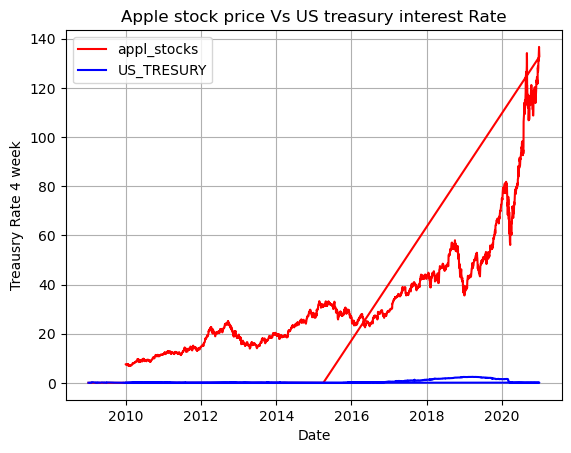

NameError: name 'b' is not defined

In [12]:
appl_stocks, = plt.plot(close_profit_data['Date'], close_profit_data['Close'], color="red", label="appl_stocks")
US_TRESURY, = plt.plot(close_profit_data['Date'], close_profit_data['4 WEEKS BANK DISCOUNT'], color="blue", label="US_TRESURY")
plt.title("Apple stock price Vs US treasury interest Rate")
plt.xlabel("Date")
plt.ylabel("Treausry Rate 4 week")
plt.legend(handles=[appl_stocks, US_TRESURY], loc="best")

#plt.xlim(2010,2023)
#plt.ylim(7,40)
plt.grid()
plt.show()


#print("The slope of Us Treausry Rates over 2009-2020 is " + str(slope ))
#print("The slope of Apple Stocks over 2009-2020 is " )

#For item in interestratedata_df['Date']:
  #  Date = "2020-12-31"
   # Newdate = Date.split("-")
    #Newdatesum[item]=Newdate[0]

#a = interestratedata_df['4 WEEKS BANK DISCOUNT']
#b = interestratedata_df['Date']
#from scipy.stats import linregress
#linregress(a, b)





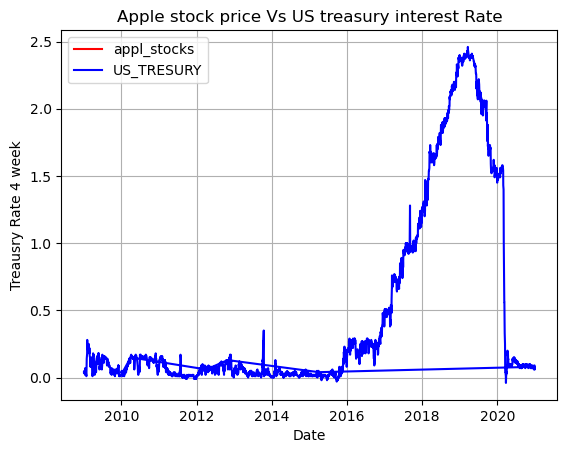

In [13]:

US_TRESURY, = plt.plot(close_profit_data['Date'], close_profit_data['4 WEEKS BANK DISCOUNT'], color="blue", label="US_TRESURY")
plt.title("Apple stock price Vs US treasury interest Rate")
plt.xlabel("Date")
plt.ylabel("Treausry Rate 4 week")
plt.legend(handles=[appl_stocks, US_TRESURY], loc="best")

#plt.xlim(2010,2023)
#plt.ylim(7,40)
plt.grid()
plt.show()

In [ ]:
x_values = close_profit_data["Close"]
y_values = close_profit_data['4 WEEKS BANK DISCOUNT']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.title("Interest rate versus Stock Price")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("apple_stocks")
plt.ylabel("4 WEEKS BANK DISCOUNT")
print(f'The r-value is {rvalue}')

In [ ]:
close_profit_data
